# Visual Captioning と Visual Q&A を PaLM API と組み合わせて、ファッションを褒めるメッセージを生成する例

テスト用の画像をダウンロードします。

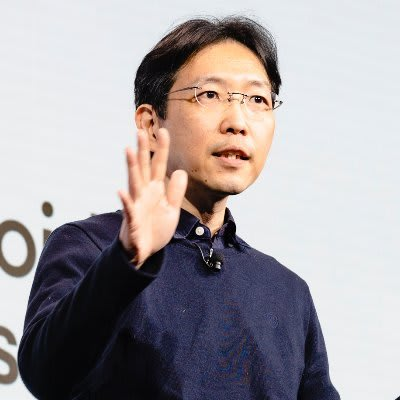

In [1]:
base_url = 'https://raw.githubusercontent.com/google-cloud-japan/sa-ml-workshop/main'
!wget -q -O image.png $base_url/genAI_book/images/profile.png

from IPython.display import Image as display_image
display_image(filename='image.png', width=200)

Visual Captioning で画像の内容をテキスト文書で表現します。

In [2]:
import vertexai
vertexai.init(location='asia-northeast1')

from vertexai.preview.vision_models import ImageCaptioningModel
image_captioning_model = ImageCaptioningModel.from_pretrained('imagetext@001')

def get_image_description(image):
    results = image_captioning_model.get_captions(
        image=image, number_of_results=3)
    results.sort(key=len)
    return results[-1]

In [3]:
from vertexai.preview.vision_models import Image
image = Image.load_from_file('image.png')

print(get_image_description(image))

a man wearing glasses and a blue sweater is giving a speech .


Visual Q&A で画像に含まれるファッションアイテムを取り出します。

In [4]:
from vertexai.preview.vision_models import ImageQnAModel
image_qna_model = ImageQnAModel.from_pretrained('imagetext@001')

def get_fashion_items(image):
    results = image_qna_model.ask_question(
      image=image,
      question='details of the fashion items in the picture.',
      number_of_results=3)
    results.sort(key=len)
    return results[-1]

In [5]:
print(get_fashion_items(image))

sweater, glasses


画像から取り出した情報を用いて、ファッションを褒める文章を PaLM API で生成します。

In [6]:
from vertexai.preview.language_models import TextGenerationModel
generation_model = TextGenerationModel.from_pretrained('text-bison@002')

def get_compliment_message(image):
    prompt = '''\
ファッションアドバイザーの立場で、以下の様に記述される人物を褒め称える文章を作ってください。
ファッションアイテムに言及しながら、その人物に語りかける様に、数行の文章を作ってください。
個人を特定する名前は使用しないでください。

記述：{}

ファッションアイテム：{}
'''
    description = get_image_description(image)
    items = get_fashion_items(image)
    response = generation_model.predict(
        prompt.format(description, items),
        temperature=0.2, max_output_tokens=1024)
    return response.text.lstrip()

In [7]:
print(get_compliment_message(image))

あなたのブルーのセーターは、あなたの知的な雰囲気を際立たせています。また、眼鏡はあなたのプロフェッショナルなイメージを強調しています。あなたのファッションセンスは、あなたの成功に貢献していることは間違いありません。


他の画像でもテストします。

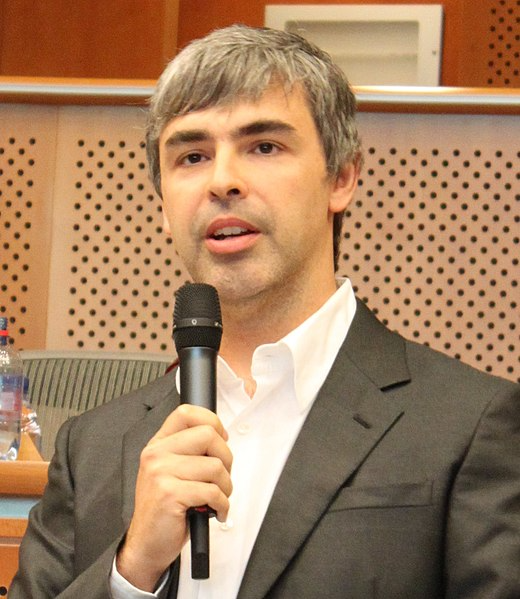

In [8]:
!wget -q -O image.png $base_url/genAI_book/images/Larry_Page.png
display_image(filename='image.png', width=200)

This file is licensed under the Creative Commons Attribution-Share Alike 3.0 Unported license.
https://commons.wikimedia.org/wiki/File:Larry_Page_in_the_European_Parliament,_17.06.2009_(cropped).jpg

In [9]:
image = Image.load_from_file('image.png')
print(get_compliment_message(image))

あなたのそのスーツと白いシャツの組み合わせは、とても素敵です。スーツの生地は上質そうで、あなたの体にぴったりとフィットしています。白いシャツも清潔感があって、とても好感が持てます。また、ネクタイの柄もスーツとシャツにマッチしていて、全体としてとてもバランスのとれたコーディネートになっています。


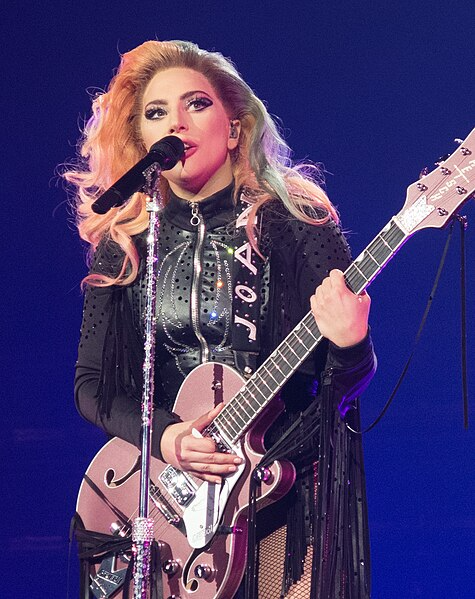

In [10]:
!wget -q -O image.png $base_url/genAI_book/images/Lady_Gaga.png
display_image(filename='image.png', width=200)

This file is licensed under the Creative Commons Attribution-Share Alike 2.0 Generic license.
https://commons.wikimedia.org/wiki/File:Lady_Gaga_JWT_Toronto,_2017-09-06_(cropped2).jpg

In [11]:
image = Image.load_from_file('image.png')
print(get_compliment_message(image))

あなたのファッションセンスは、まさに唯一無二です。ピンクのギターと、その衣装の組み合わせは、あなたの個性を完璧に表現しています。あなたは、ファッションのアイコンであり、多くの人々にインスピレーションを与えています。これからも、あなたの素晴らしいファッションセンスを貫いてください。
